In [72]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('sequence_csv/1.1.1.2_test.csv', header=None);

,0,1
0,salp:111975629,atggcagtggcaggtaaaaatgactttgcagttctcaacaccgggc...
1,salt:AO058_14645,atgaaaacattaaagtttaagaacggtgatgaaatgccggccatag...
2,sanh:107692407,atgcagcatattcaacgtgctctgcgtcttgtcattcattctcaca...
3,sasa:106584055,atggcagtggcaggtaaaaatgactttgctgttctcaacaccgggc...
4,sbi:8061760,atggctgaatcctttgttctcaataccggcgcgaggatcccatcgg...


In [58]:
df_all = pd.DataFrame()
for file_name in glob.glob('./sequence_csv/*'):
    df = pd.read_csv(file_name, header=None, names=['KEGG', 'Text']);
    is_test = 'test' in file_name
    class_name = file_name.split('/')[-1].replace('_train.csv','').replace('_test.csv','')
    df['is_test'] = is_test
    df['class'] = class_name
    df_all = pd.concat([df_all, df])
# df_all.sample(n=10)

In [118]:
def add_organism(row):
    row['KEGG_Organism'] = row['KEGG'].split(':')[0]
    row['KEGG_Gene'] = row['KEGG'].split(':')[1]
    return row

df_all = df_all.apply(lambda row: add_organism(row), axis=1)

In [119]:
df_all.sample(n=10)

,KEGG,Text,is_test,class,KEGG_Organism,KEGG_Gene
2115,ctes:O987_19835,atgaacccaaggaataagccccccaccaccagcctgtgcacgcata...,False,citrite_Si_synthase,ctes,O987_19835
4840,lve:103072605,atgcctgaaaaaggattagcaaaatcttcacctgtcagggtacagc...,False,alcohol_dehydrogenase,lve,103072605
894,bwd:CT694_29030,atgaaagaaattcaagttggtttattaggtcttgggacagttggga...,False,1.1.1.3,bwd,CT694_29030
7061,rtr:RTCIAT899_PC05295,atggacgtaagagcagcggtcgcggttgcggctggcaagccgcttg...,False,alcohol_dehydrogenase,rtr,RTCIAT899_PC05295
5718,pavi:110770701,atgggaaaccaaggttttctatcaaagggactcccattaatcactt...,False,alcohol_dehydrogenase,pavi,110770701
6332,ppsy:AOC04_15035,atgatcaagtcacgtgctgccgtagccttcgaggccaaaaaaccgc...,False,alcohol_dehydrogenase,ppsy,AOC04_15035
1906,bsi:BS1330_I0848,atgcgcgccttgcagcttctcgatgatcgccgccttgaaatcaccg...,False,alcohol_dehydrogenase,bsi,BS1330_I0848
5130,ppr:PBPRA1043,ttgacatttgggctaacgaaaggtacaacaaaaggaggtccgtatt...,False,citrite_Si_synthase,ppr,PBPRA1043
433,sphc:CVN68_12715,atgaccgaaccgcttcgtatcgcactcgccggcctcggaaccgtgg...,True,1.1.1.3,sphc,CVN68_12715
3347,kra:Krad_1140,gtgttgggcaccgtcgacgggggcgggtacggtcgcgacatggctg...,False,citrite_Si_synthase,kra,Krad_1140


In [120]:
df_all.to_csv('combined.csv')

In [69]:
# Test, Train Split
np.sum(df_all['is_test'] == True) / len(df_all) * 100, np.sum(df_all['is_test'] == False) / len(df_all) * 100

(19.99623706491063, 80.00376293508937)

In [113]:
# Number of samples in each class
class_sizes = df_all.groupby(['class']).size()
class_sizes = class_sizes / sum(class_sizes)

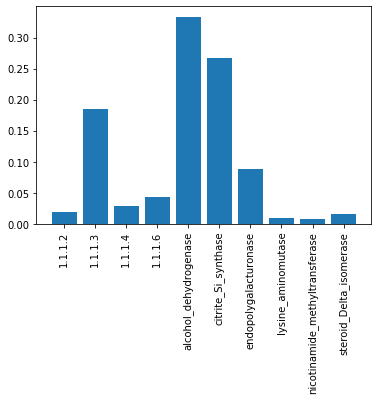

In [114]:
plt.bar(class_sizes.keys(), height=class_sizes.values)
plt.xticks(rotation='vertical')
plt.show()

In [175]:
organizms_sizes = df_all.groupby(['KEGG_Organism']).size().sort_values(ascending=False)
print('Number of organizms:', len(organizms_sizes))
print('Number of samples per organizm:')
organizms_sizes.head(10)

Number of organizms: 5477
Number of samples per organizm:


KEGG_Organism
bna     133
csat    119
psom     77
han      70
nta      69
cmax     67
boe      63
gmx      62
ghi      62
brp      60
dtype: int64

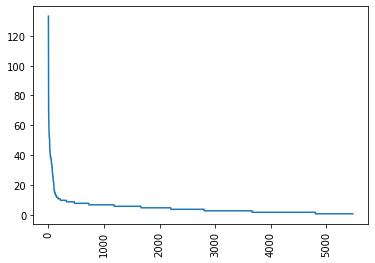

In [176]:
organizms_pos = [i for i, _ in enumerate(organizms_sizes)]
plt.plot(organizms_pos, organizms_sizes.values, )
plt.xticks(rotation='vertical')
plt.show()